In [1]:
import os
import pickle
import numpy as np
import pandas as pd
import scipy.stats as ss
from datetime import datetime
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [2]:
f20rep1 = np.load('f20rep1.npy')
f20rep2 = np.load('f20rep2.npy')
f20rep3 = np.load('f20rep3.npy')
f40rep1 = np.load('f40rep1.npy')
f40rep2 = np.load('f40rep2.npy')
f40rep3 = np.load('f40rep3.npy')
f80rep1 = np.load('f80rep1.npy')
f80rep2 = np.load('f80rep2.npy')
f80rep3 = np.load('f80rep3.npy')

In [3]:
f20_t = (f20rep1.item()['t_mat']+f20rep2.item()['t_mat']+f20rep3.item()['t_mat'])/3
f40_t = (f40rep1.item()['t_mat']+f40rep2.item()['t_mat']+f40rep3.item()['t_mat'])/3
f80_t = (f80rep1.item()['t_mat']+f80rep2.item()['t_mat']+f80rep3.item()['t_mat'])/3

In [4]:
f20_t

array([[0.03026867, 0.02884133, 0.02884067, ..., 0.15896267, 0.15424267,
        0.15320867],
       [0.01361667, 0.013456  , 0.013448  , ..., 0.02506433, 0.02504467,
        0.024959  ],
       [0.01362867, 0.01352733, 0.01356433, ..., 0.02465067, 0.02474333,
        0.02463067],
       ...,
       [0.01360767, 0.01345333, 0.01355733, ..., 0.025557  , 0.02531567,
        0.026259  ],
       [0.01373267, 0.013621  , 0.01375233, ..., 0.02566333, 0.025694  ,
        0.025593  ],
       [0.01406067, 0.01400267, 0.014028  , ..., 0.02538333, 0.025409  ,
        0.025421  ]])

In [5]:
def smooth(mat,h):
  outmat = mat
  (nrow,ncol) = mat.shape
  for i in range(nrow):
    for j in range(ncol):
      index = np.arange(max(j-h,0),min(ncol,j+h))
      outmat[i,j] = np.mean(mat[i,index])
  return outmat

In [6]:
def smooth_vec(vec,h):
  outvec = vec
  for j in range(len(vec)):
    index = np.arange(max(j-h,0),min(len(vec),j+h))
    outvec[j] = np.mean(vec[index])
  return outvec

In [7]:
f20_t = smooth(f20_t,10)
f40_t = smooth(f40_t,10)
f80_t = smooth(f80_t,10)

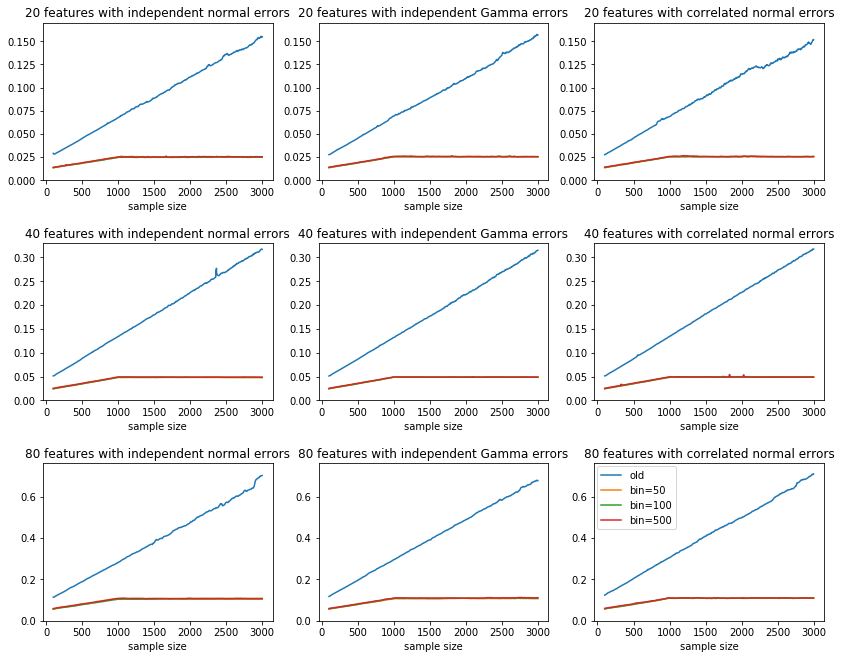

In [8]:
plt.figure(figsize=(14,11))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
num_features = [20,40,80]
scenarios = ['independent normal errors','independent Gamma errors',
            'correlated normal errors']
lim_vec = [0.17,0.33,0.76]
for i in range(3):
  if i == 0:
    mat = f20_t
  elif i == 1:
    mat = f40_t
  else:
    mat = f80_t
  for j in range(3):
    plt.subplot(3, 3, 3*i+j+1)
    old = mat[4*j,:]
    b50 = mat[4*j+1,:]
    b100 = mat[4*j+2,:]
    b500 = mat[4*j+3,:]
    plt.plot(np.arange(100,3000),old, label='old')
    plt.plot(np.arange(100,3000),b50, label='bin=50')
    plt.plot(np.arange(100,3000),b100, label='bin=100')
    plt.plot(np.arange(100,3000),b500, label='bin=500')
    plt.xlabel('sample size')
    plt.title(str(num_features[i])+' features with '+scenarios[j])
    plt.ylim(0,lim_vec[i])
    if i==2 and j==2:
      plt.legend(loc= 'upper left', borderaxespad=0.3)
plt.savefig("computational_time.pdf")

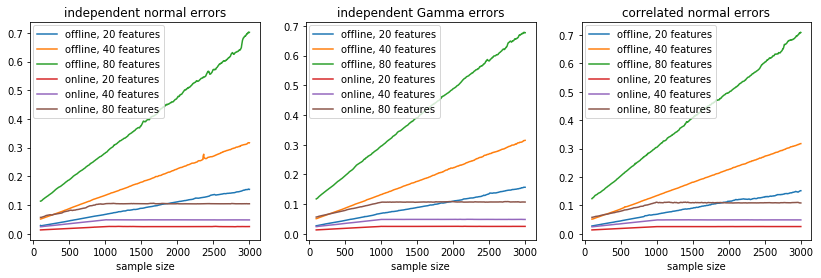

In [9]:
plt.figure(figsize=(14,4))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
scenarios = ['independent normal errors','independent Gamma errors',
            'correlated normal errors']

for j in range(3):
  plt.subplot(1, 3, j+1)
  old20 = f20_t[4*j,:]
  old40 = f40_t[4*j,:]
  old80 = f80_t[4*j,:]
  b50_20 = f20_t[4*j+1,:]
  b50_40 = f40_t[4*j+1,:]
  b50_80 = f80_t[4*j+1,:]
  plt.plot(np.arange(100,3000),old20, label='offline, 20 features')
  plt.plot(np.arange(100,3000),old40, label='offline, 40 features')
  plt.plot(np.arange(100,3000),old80, label='offline, 80 features')
  plt.plot(np.arange(100,3000),b50_20, label='online, 20 features')
  plt.plot(np.arange(100,3000),b50_40, label='online, 40 features')
  plt.plot(np.arange(100,3000),b50_80, label='online, 80 features')
  plt.xlabel('sample size')
  plt.title(scenarios[j])
  plt.legend(loc= 'upper left', borderaxespad=0.3)
plt.savefig("computational_time.pdf")

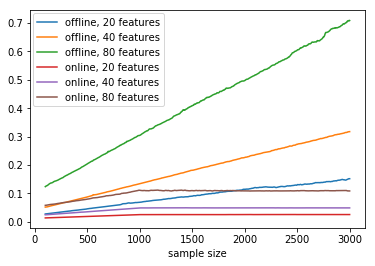

In [10]:
plt.figure(figsize=(6,4))
j = 2
old20 = f20_t[4*j,:]
old40 = f40_t[4*j,:]
old80 = f80_t[4*j,:]
b50_20 = f20_t[4*j+1,:]
b50_40 = f40_t[4*j+1,:]
b50_80 = f80_t[4*j+1,:]
plt.plot(np.arange(100,3000),old20, label='offline, 20 features')
plt.plot(np.arange(100,3000),old40, label='offline, 40 features')
plt.plot(np.arange(100,3000),old80, label='offline, 80 features')
plt.plot(np.arange(100,3000),b50_20, label='online, 20 features')
plt.plot(np.arange(100,3000),b50_40, label='online, 40 features')
plt.plot(np.arange(100,3000),b50_80, label='online, 80 features')
plt.xlabel('sample size')
plt.legend(loc= 'upper left', borderaxespad=0.3)
plt.savefig("computational_time.pdf")

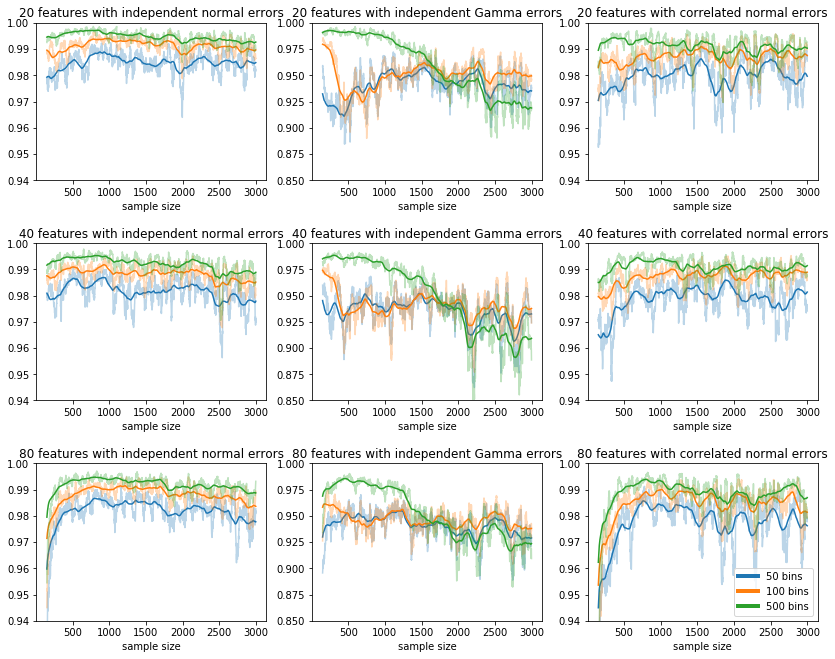

In [11]:
plt.figure(figsize=(14,11))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
num_features = [20,40,80]
scenarios = ['independent normal errors','independent Gamma errors',
            'correlated normal errors']
for i in range(3):
  if i == 0:
    mat1 = f20rep1.item()['stat_mat']
    mat2 = f20rep2.item()['stat_mat']
    mat3 = f20rep3.item()['stat_mat']
  elif i == 1:
    mat1 = f40rep1.item()['stat_mat']
    mat2 = f40rep2.item()['stat_mat']
    mat3 = f40rep3.item()['stat_mat']
  else:
    mat1 = f80rep1.item()['stat_mat']
    mat2 = f80rep2.item()['stat_mat']
    mat3 = f80rep3.item()['stat_mat']
  for j in range(3):
    plt.subplot(3, 3, 3*i+j+1)
    cor50 = np.zeros(2850)
    cor100 = np.zeros(2850)
    cor500 = np.zeros(2850)
    for k in range(3):
      if k ==0:
        mat = mat1
      elif k==1:
        mat = mat2
      else:
        mat = mat3
      old = mat[4*j,:]
      b50 = mat[4*j+1,:]
      b100 = mat[4*j+2,:]
      b500 = mat[4*j+3,:]
      for r in np.arange(50,len(old)):
        index = np.arange(r-50,r)
        cor50[r-50] = cor50[r-50]+ss.spearmanr(old[index],b50[index])[0]
        cor100[r-50] = cor100[r-50]+ss.spearmanr(old[index],b100[index])[0]
        cor500[r-50] = cor500[r-50]+ss.spearmanr(old[index],b500[index])[0]
    cor50 = cor50/3
    cor100 = cor100/3
    cor500 = cor500/3
    
    plt.plot(np.arange(150,3000),cor50, alpha = 0.3,  color ='tab:blue')
    plt.plot(np.arange(150,3000),smooth_vec(cor50,100),   color ='tab:blue' )
    plt.plot(np.arange(150,3000),cor100, alpha = 0.3, color = 'tab:orange')
    plt.plot(np.arange(150,3000),smooth_vec(cor100,100),  color = 'tab:orange')
    plt.plot(np.arange(150,3000),cor500, alpha = 0.3, color = 'tab:green')
    plt.plot(np.arange(150,3000),smooth_vec(cor500,100),  color = 'tab:green')
    if j==0:
      plt.ylim(0.94,1)
    if j==1:
      plt.ylim(0.85,1)
    if j==2:
      plt.ylim(0.94,1)
    plt.xlabel('sample size')
    plt.title(str(num_features[i])+' features with '+scenarios[j])  
    if i==2 and j==2:
      custom_lines = [Line2D([0], [0], color='tab:blue', lw=4, label = '50 bins'),
                      Line2D([0], [0], color='tab:orange', lw=4, label = '100 bins'),
                      Line2D([0], [0], color='tab:green', lw=4, label = '500 bins')]
      plt.legend(handles = custom_lines, loc = "lower right")
plt.savefig("correlation in test_stat.pdf")

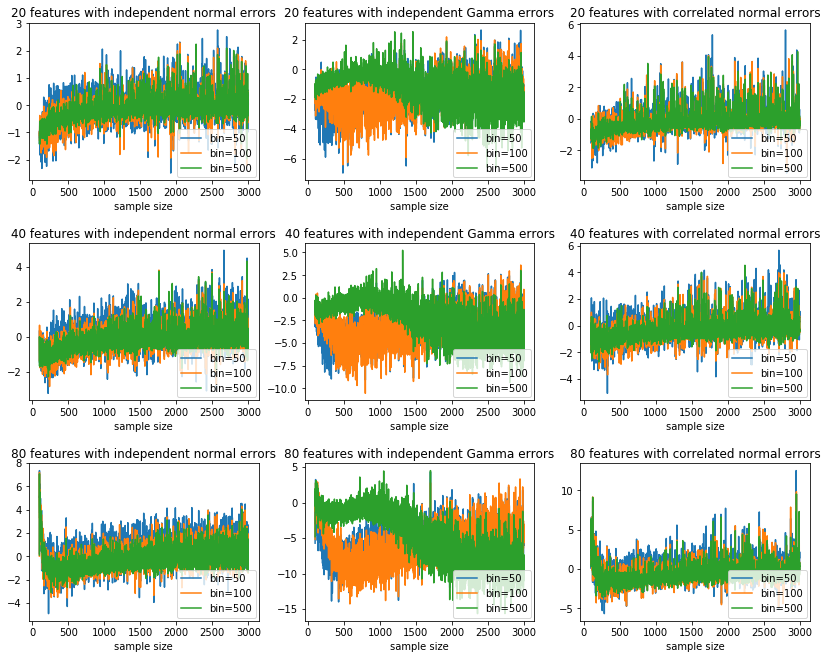

In [12]:
plt.figure(figsize=(14,11))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
num_features = [20,40,80]
scenarios = ['independent normal errors','independent Gamma errors',
            'correlated normal errors']
for i in range(3):
  if i == 0:
    mat1 = f20rep1.item()['stat_mat']
    mat2 = f20rep2.item()['stat_mat']
    mat3 = f20rep3.item()['stat_mat']
  elif i == 1:
    mat1 = f40rep1.item()['stat_mat']
    mat2 = f40rep2.item()['stat_mat']
    mat3 = f40rep3.item()['stat_mat']
  else:
    mat1 = f80rep1.item()['stat_mat']
    mat2 = f80rep2.item()['stat_mat']
    mat3 = f80rep3.item()['stat_mat']
  for j in range(3):
    plt.subplot(3, 3, 3*i+j+1)
    diff50 = np.zeros(2900)
    diff100 = np.zeros(2900)
    diff500 = np.zeros(2900)
    for k in range(3):
      if k ==0:
        mat = mat1
      elif k==1:
        mat = mat2
      else:
        mat = mat3
      old = mat[4*j,:]
      b50 = mat[4*j+1,:]
      b100 = mat[4*j+2,:]
      b500 = mat[4*j+3,:]
      diff50 = diff50 + (b50-old)
      diff100 = diff100 + (b100-old)
      diff500 = diff500 + (b500-old)
    diff50 = diff50/3
    diff100 = diff100/3
    diff500 = diff500/3
    plt.plot(np.arange(100,3000),diff50, label='bin=50')
    plt.plot(np.arange(100,3000),diff100, label='bin=100')
    plt.plot(np.arange(100,3000),diff500, label='bin=500')
    plt.xlabel('sample size')
    plt.title(str(num_features[i])+' features with '+scenarios[j])
    plt.legend(loc= 'lower right', borderaxespad=0.3)
plt.savefig("difference in test_stat.pdf")

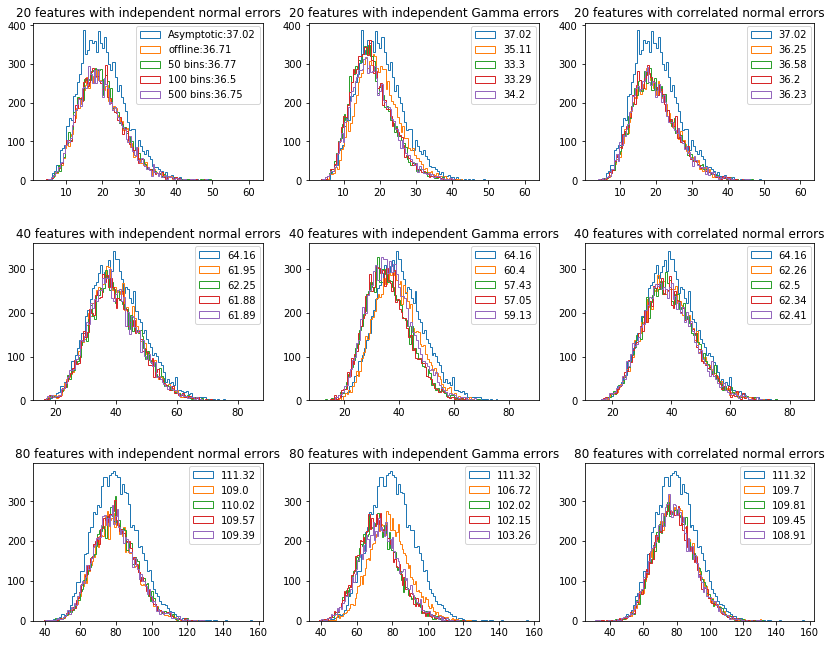

In [13]:
h = 99
plt.figure(figsize=(14,11))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
num_features = [20,40,80]
scenarios = ['independent normal errors','independent Gamma errors',
            'correlated normal errors']
for i in range(3):
  true_chisq = np.random.chisquare(num_features[i], size=10000)
  if i == 0:
    mat1 = f20rep1.item()['stat_mat']
    mat2 = f20rep2.item()['stat_mat']
    mat3 = f20rep3.item()['stat_mat']
  elif i == 1:
    mat1 = f40rep1.item()['stat_mat']
    mat2 = f40rep2.item()['stat_mat']
    mat3 = f40rep3.item()['stat_mat']
  else:
    mat1 = f80rep1.item()['stat_mat']
    mat2 = f80rep2.item()['stat_mat']
    mat3 = f80rep3.item()['stat_mat']
  for j in range(3):
    plt.subplot(3, 3, 3*i+j+1)
    old = np.concatenate((mat1[4*j,:],mat2[4*j,:],mat3[4*j,:]))
    b50 = np.concatenate((mat1[4*j+1,:],mat2[4*j+1,:],mat3[4*j+1,:]))
    b100 = np.concatenate((mat1[4*j+2,:],mat2[4*j+2,:],mat3[4*j+2,:]))
    b500 = np.concatenate((mat1[4*j+3,:],mat2[4*j+3,:],mat3[4*j+3,:]))
    if i==0 and j==0:
      plt.hist(true_chisq,bins=100,histtype="step",label="Asymptotic:"+str(np.round(np.percentile(true_chisq,h),2)))
      plt.hist(old,bins=100,histtype="step",label="offline:"+str(np.round(np.percentile(old,h),2)))
      plt.hist(b50,bins=100,histtype="step",label='50 bins:'+str(np.round(np.percentile(b50,h),2)))
      plt.hist(b100,bins=100,histtype="step",label='100 bins:'+str(np.round(np.percentile(b100,h),2)))
      plt.hist(b500,bins=100,histtype="step",label='500 bins:'+str(np.round(np.percentile(b500,h),2)))
      plt.title(str(num_features[i])+' features with '+scenarios[j])
      plt.legend(loc= 'upper right', borderaxespad=0.3)
    else:
      plt.hist(true_chisq,bins=100,histtype="step",label=str(np.round(np.percentile(true_chisq,h),2)))
      plt.hist(old,bins=100,histtype="step",label=str(np.round(np.percentile(old,h),2)))
      plt.hist(b50,bins=100,histtype="step",label=str(np.round(np.percentile(b50,h),2)))
      plt.hist(b100,bins=100,histtype="step",label=str(np.round(np.percentile(b100,h),2)))
      plt.hist(b500,bins=100,histtype="step",label=str(np.round(np.percentile(b500,h),2)))
      plt.title(str(num_features[i])+' features with '+scenarios[j])
      plt.legend(loc= 'upper right', borderaxespad=0.3)
plt.savefig("dist of test_stat.pdf")

In [25]:
np.round(np.percentile(old,95),2)

100.37

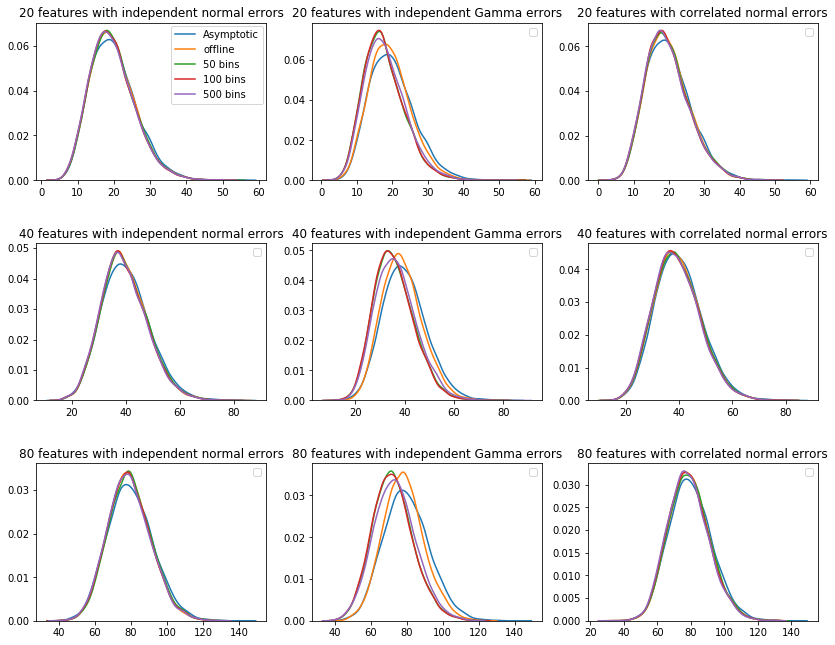

In [20]:
h = 99
import seaborn as sns
plt.figure(figsize=(14,11))
plt.subplots_adjust(wspace=0.2, hspace=0.4)
num_features = [20,40,80]
scenarios = ['independent normal errors','independent Gamma errors',
            'correlated normal errors']
for i in range(3):
  true_chisq = np.random.chisquare(num_features[i], size=10000)
  if i == 0:
    mat1 = f20rep1.item()['stat_mat']
    mat2 = f20rep2.item()['stat_mat']
    mat3 = f20rep3.item()['stat_mat']
  elif i == 1:
    mat1 = f40rep1.item()['stat_mat']
    mat2 = f40rep2.item()['stat_mat']
    mat3 = f40rep3.item()['stat_mat']
  else:
    mat1 = f80rep1.item()['stat_mat']
    mat2 = f80rep2.item()['stat_mat']
    mat3 = f80rep3.item()['stat_mat']
  for j in range(3):
    plt.subplot(3, 3, 3*i+j+1)
    old = np.concatenate((mat1[4*j,:],mat2[4*j,:],mat3[4*j,:]))
    b50 = np.concatenate((mat1[4*j+1,:],mat2[4*j+1,:],mat3[4*j+1,:]))
    b100 = np.concatenate((mat1[4*j+2,:],mat2[4*j+2,:],mat3[4*j+2,:]))
    b500 = np.concatenate((mat1[4*j+3,:],mat2[4*j+3,:],mat3[4*j+3,:]))
    if i==0 and j==0:
      sns.distplot(true_chisq,hist = False, kde = True,label="Asymptotic")
      sns.distplot(old,hist = False, kde = True,label="offline")
      sns.distplot(b50,hist = False, kde = True,label='50 bins')
      sns.distplot(b100,hist = False, kde = True,label='100 bins')
      sns.distplot(b500,hist = False, kde = True,label='500 bins')
      plt.title(str(num_features[i])+' features with '+scenarios[j])
      plt.legend(loc= 'upper right', borderaxespad=0.3)
    else:
      sns.distplot(true_chisq,hist = False, kde = True, label="Asymptotic")
      sns.distplot(old,hist = False, kde = True,label="offline")
      sns.distplot(b50,hist = False, kde = True,label='50 bins')
      sns.distplot(b100,hist = False, kde = True,label='100 bins')
      sns.distplot(b500,hist = False, kde = True,label='500 bins')
      plt.legend('')
      plt.title(str(num_features[i])+' features with '+scenarios[j])
plt.savefig("dist of test_stat.pdf")

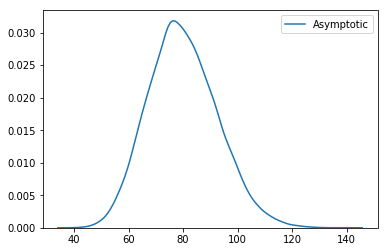

In [16]:
import seaborn as sns
sns.distplot(true_chisq,hist = False, kde = True,label="Asymptotic")